In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import LabelEncoder

!pip install unidecode
!pip install openpyxl

import pandas as pd
from pandas import read_excel
import numpy as np
import re
from re import sub
import multiprocessing
from unidecode import unidecode
import os
from time import time

import csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 12.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train_path = '/content/drive/MyDrive/datasets/thesis/train_new.xlsx'
test_path = '/content/drive/MyDrive/datasets/thesis/test_new.xlsx'

In [ ]:
train = pd.read_excel(train_path)
train.head()

test = pd.read_excel(test_path)
test.head()



,text,classes
0,"সে যেটা করছে, সেটা ঠিক না।",fear
1,সব কিছু কর্তাদের ইচ্ছাতে হয়,surprise
2,"বর্তমানে সেনাবাহিনীর চাকরি না করে, ফুটপাতে বসে...",joy
3,টাকা পাইলে সব খানকীর ছেলেরা এমন কাজ করে !,joy
4,ম্যাজিস্ট্রেট মহোদয়ের দৃষ্টি আকর্ষণ করছি.... আ...,joy


In [ ]:
len(train.text.value_counts())

16821

In [ ]:
len(test.text.value_counts())

2382

In [ ]:
train.shape

(24654, 2)

In [ ]:
test.shape

(2382, 2)

In [ ]:
train.dropna()

,text,classes
0,সব বিদেশিকে লাথি দিয়ে বের করে দেন,fear
1,আপনি থাকলে সব সম্ভব। হোকনা শুরু যেখান থেকেই... :),sadness
2,দেবী নামের একটি ছবি কিছু দিন আগে সবাই অনেক প্র...,joy
3,তুকে সালাম ভাই।১০০%,sadness
4,"Thank You Sir.আপনার মত মানসিকতা হক সবার,এমনকি ...",sadness
...,...,...
24649,ছাগলের 19 নাম্বার বাচ্চার সাথে কিসের একমত? আমা...,joy
24650,মাস্টারমশাই বললেন তা যাই বল বাপু এ রাগ বড় ...,surprise
24651,জেভিপি'র সাবেক সাংসদ ডা. নালিন্দা জয়াতিসা গত র...,joy
24652,বুরা বেডি হাতিরজীল কি করে চেলের কোন খবর থাকে না,anger


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train['encoded_classes'] = encoder.fit_transform(train['classes'])
train.head()

test['encoded_classes'] = encoder.fit_transform(test['classes'])
test.head()

,text,classes,encoded_classes
0,"সে যেটা করছে, সেটা ঠিক না।",fear,2
1,সব কিছু কর্তাদের ইচ্ছাতে হয়,surprise,5
2,"বর্তমানে সেনাবাহিনীর চাকরি না করে, ফুটপাতে বসে...",joy,3
3,টাকা পাইলে সব খানকীর ছেলেরা এমন কাজ করে !,joy,3
4,ম্যাজিস্ট্রেট মহোদয়ের দৃষ্টি আকর্ষণ করছি.... আ...,joy,3


In [ ]:
xtrain = train['text']
ytrain = train['encoded_classes']
xtest = test['text']
ytest = test['encoded_classes']

In [ ]:
df = pd.DataFrame(xtest)
df1 = pd.DataFrame(ytest)

In [ ]:
df.head()

,text
0,"সে যেটা করছে, সেটা ঠিক না।"
1,সব কিছু কর্তাদের ইচ্ছাতে হয়
2,"বর্তমানে সেনাবাহিনীর চাকরি না করে, ফুটপাতে বসে..."
3,টাকা পাইলে সব খানকীর ছেলেরা এমন কাজ করে !
4,ম্যাজিস্ট্রেট মহোদয়ের দৃষ্টি আকর্ষণ করছি.... আ...


In [ ]:
df.shape

(2382, 1)

In [ ]:
df1.shape

(2382, 1)

In [ ]:
xtrain = xtrain.astype(str).values.tolist()
xtest = xtest.astype(str).values.tolist()

In [ ]:
from transformers import AutoTokenizer, RobertaForSequenceClassification

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")
model = RobertaForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-emotion", problem_type="multi_label_classification")

In [ ]:
# Tokenize train reviews
encoded_text = [tokenizer.encode(sent, add_special_tokens=True) for sent in xtrain]

# Find the longest tokenized review
max_len = max([len(sent) for sent in encoded_text])
print('Max length: ', max_len)

Max length:  5752


In [ ]:
encoded_data_train = tokenizer.batch_encode_plus(
    xtrain,
    add_special_tokens=True,
    return_attention_mask=True,
    max_length=64,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

encoded_data_test = tokenizer.batch_encode_plus(
    xtest,
    add_special_tokens=True,
    return_attention_mask=True,
    max_length=64,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

In [ ]:
!pip install torch
import torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from torch.utils.data import TensorDataset

In [ ]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(ytrain.values)


input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(ytest.values)


# Pytorch TensorDataset Instance
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)

In [ ]:

from transformers import DataCollatorWithPadding,AutoModelForSequenceClassification, Trainer, TrainingArguments,AutoTokenizer,AutoModel,AutoConfig
from transformers.modeling_outputs import TokenClassifierOutput
import torch
import torch.nn as nn
import pandas as pd

In [ ]:
class CustomModel(nn.Module):
  def __init__(self,checkpoint,num_labels):
    super(CustomModel,self).__init__()
    self.num_labels = num_labels

    #Load Model with given checkpoint and extract its body
    self.model = model = AutoModel.from_pretrained(checkpoint,config=AutoConfig.from_pretrained(checkpoint, output_attentions=True,output_hidden_states=True))
    self.dropout = nn.Dropout(0.1)
    self.classifier = nn.Linear(768,num_labels) # load and initialize weights

  def forward(self, input_ids=None, attention_mask=None,labels=None):
    #Extract outputs from the body
    outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)

    #Add custom layers
    sequence_output = self.dropout(outputs[0]) #outputs[0]=last hidden state

    logits = self.classifier(sequence_output[:,0,:].view(-1,768)) # calculate losses

    loss = None
    if labels is not None:
      loss_fct = nn.CrossEntropyLoss()
      loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))

    return TokenClassifierOutput(loss=loss, logits=logits, hidden_states=outputs.hidden_states,attentions=outputs.attentions)

In [ ]:
checkpoint="cardiffnlp/twitter-roberta-base-emotion"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=CustomModel(checkpoint=checkpoint,num_labels=6).to(device)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-emotion were not used when initializing RobertaModel: ['classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight', 'classifier.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-emotion and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

In [ ]:
for name, param in model.named_parameters():
    print(name, param.requires_grad)

model.embeddings.word_embeddings.weight True
model.embeddings.position_embeddings.weight True
model.embeddings.token_type_embeddings.weight True
model.embeddings.LayerNorm.weight True
model.embeddings.LayerNorm.bias True
model.encoder.layer.0.attention.self.query.weight True
model.encoder.layer.0.attention.self.query.bias True
model.encoder.layer.0.attention.self.key.weight True
model.encoder.layer.0.attention.self.key.bias True
model.encoder.layer.0.attention.self.value.weight True
model.encoder.layer.0.attention.self.value.bias True
model.encoder.layer.0.attention.output.dense.weight True
model.encoder.layer.0.attention.output.dense.bias True
model.encoder.layer.0.attention.output.LayerNorm.weight True
model.encoder.layer.0.attention.output.LayerNorm.bias True
model.encoder.layer.0.intermediate.dense.weight True
model.encoder.layer.0.intermediate.dense.bias True
model.encoder.layer.0.output.dense.weight True
model.encoder.layer.0.output.dense.bias True
model.encoder.layer.0.output.La

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size=128;
dataloader_train = DataLoader(dataset_train,
                              sampler=RandomSampler(dataset_train),
                              batch_size=batch_size)


dataloader_test = DataLoader(dataset_test,
                                   sampler=SequentialSampler(dataset_test),
                                   batch_size=batch_size)

In [ ]:
from transformers import AdamW,get_scheduler

optimizer = AdamW(model.parameters(), lr=2e-5)

num_epochs = 20
num_training_steps = num_epochs * len(dataloader_train)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps,
)
print(num_training_steps)


3860


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from tqdm.auto import tqdm




for epoch in range(num_epochs):
  model.train()
  loss_train_total = 0
  progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
  for batch in progress_bar:
      batch = tuple(b.to(device) for b in batch)
      inputs = {'input_ids':      batch[0].to(device),
                'attention_mask': batch[1].to(device),
                'labels':         batch[2].to(device),
                }

      outputs = model(**inputs)
      loss = outputs[0]
      loss_train_total += loss.item()
      loss.backward()

      optimizer.step()
      lr_scheduler.step()
      optimizer.zero_grad()
      progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
  tqdm.write(f'\nEpoch {epoch}')
  loss_train_avg = loss_train_total/len(dataloader_train)
  tqdm.write(f'Training loss: {loss_train_avg}')

Epoch 0:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 0
Training loss: 1.6734013446254434


Epoch 1:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 1
Training loss: 1.2228369160019672


Epoch 2:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 2
Training loss: 1.1497813447769443


Epoch 3:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 3
Training loss: 1.109432928302745


Epoch 4:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 4
Training loss: 1.0834690134760012


Epoch 5:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 5
Training loss: 1.068440292165687


Epoch 6:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 6
Training loss: 1.0583980281118284


Epoch 7:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 7
Training loss: 1.0424556963802


Epoch 8:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 8
Training loss: 1.0331958773222611


Epoch 9:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 9
Training loss: 1.021483471047693


Epoch 10:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 10
Training loss: 1.0106806696387771


Epoch 11:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 11
Training loss: 0.9964030851354253


Epoch 12:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 12
Training loss: 0.9868384778808436


Epoch 13:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 13
Training loss: 0.9736941462971386


Epoch 14:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 14
Training loss: 0.9643960082469208


Epoch 15:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 15
Training loss: 0.9524306126826786


Epoch 16:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 16
Training loss: 0.9443388862313384


Epoch 17:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 17
Training loss: 0.9324955189783957


Epoch 18:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 18
Training loss: 0.9282809644165434


Epoch 19:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 19
Training loss: 0.9190432182247774


In [ ]:
def evaluate(dataloader_test):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_test:

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloader_test)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

In [ ]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

In [ ]:
val_loss, predictions, true_vals = evaluate(dataloader_test)
val_f1 = f1_score_func(predictions, true_vals)

In [ ]:
print('Val Loss = ', val_loss)
print('Val F1 = ', val_f1)

Val Loss =  1.127289000310396
Val F1 =  0.5539216878469689


In [ ]:
encoded_classes = encoder.classes_
predicted_category = [encoded_classes[np.argmax(x)] for x in predictions]
true_category = [encoded_classes[x] for x in true_vals]

In [ ]:
x = 0
for i in range(len(true_category)):
    if true_category[i] == predicted_category[i]:
        x += 1

print('Accuracy Score = ', x / len(true_category))

Accuracy Score =  0.5512174643157011


In [ ]:
df2 = pd.DataFrame(predictions)
df2.shape

(2382, 6)

In [ ]:
df3 = pd.DataFrame(true_vals)
df3.shape

(2382, 1)

In [ ]:
df1.reset_index(inplace=True, drop=True)
df.reset_index(inplace=True, drop=True)
df2.reset_index(inplace=True, drop=True)
df3.reset_index(inplace=True, drop=True)

In [ ]:
df4 = pd.concat([df, df1, df2, df3], axis = 1)

In [ ]:
df4.shape

(2382, 9)

In [ ]:
df4.head()

,text,encoded_classes,0,1,2,3,4,5,0
0,"সে যেটা করছে, সেটা ঠিক না।",2,1.481501,0.445594,-1.471072,1.819394,-1.008606,-1.677127,2
1,সব কিছু কর্তাদের ইচ্ছাতে হয়,5,-0.233342,0.309789,0.181352,-1.143232,-1.207391,1.274051,5
2,"বর্তমানে সেনাবাহিনীর চাকরি না করে, ফুটপাতে বসে...",3,-0.034439,0.221163,-0.798337,0.683672,0.357350,-1.101476,3
3,টাকা পাইলে সব খানকীর ছেলেরা এমন কাজ করে !,3,-1.311563,-0.886100,-1.107855,8.146734,-0.879961,-2.432088,3
4,ম্যাজিস্ট্রেট মহোদয়ের দৃষ্টি আকর্ষণ করছি.... আ...,3,-0.559145,0.360087,-0.435711,0.349801,-0.027330,-0.426982,3


In [ ]:
df4.to_csv('/content/drive/MyDrive/datasets/output/roberta_output2.csv')

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_true = true_category, y_pred = predicted_category, labels=list(encoded_classes))

<Axes: >

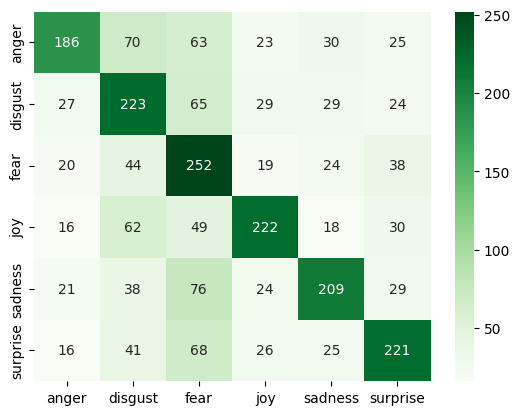

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(confusion_mat, index = list(encoded_classes),columns = list(encoded_classes))
sns.heatmap(df, annot=True,cmap="Greens", fmt='g')

Text(95.72222222222221, 0.5, 'Predicted Label')

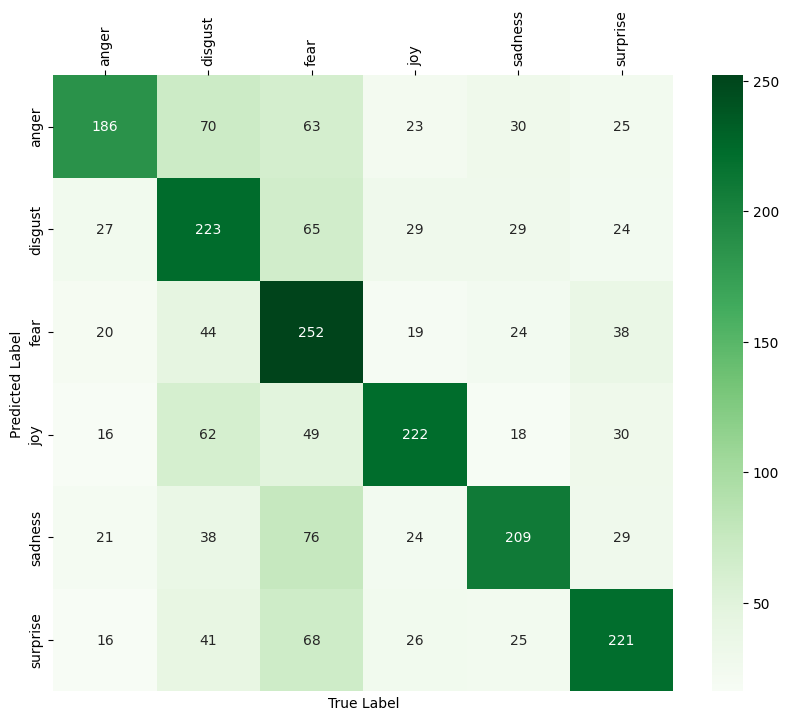

In [ ]:
import seaborn as sns
# return class label
# get confusion matrix
cm = confusion_matrix(y_true = true_category, y_pred = predicted_category, labels=list(encoded_classes))
# covert it to dataframe for plotting
cm_df = pd.DataFrame(cm,
                     index = list(encoded_classes),
                     columns = list(encoded_classes))
# plot it
plt.figure(figsize = (10,8))
g = sns.heatmap(cm_df,annot=True,cmap="Greens", fmt='g')
g.xaxis.set_ticks_position("top")
g.tick_params(axis='x', rotation=90)
g.set_xlabel("True Label")
g.set_ylabel("Predicted Label")

In [ ]:
from sklearn.metrics import classification_report
report = pd.DataFrame(classification_report(y_true = true_category, y_pred = predicted_category, output_dict=True)).transpose()
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

,precision,recall,f1-score,support
anger,65.03,46.85,54.47,397.000000
disgust,46.65,56.17,50.97,397.000000
fear,43.98,63.48,51.96,397.000000
joy,64.72,55.92,60.00,397.000000
sadness,62.39,52.64,57.10,397.000000
surprise,60.22,55.67,57.85,397.000000
accuracy,55.12,55.12,55.12,0.551217
macro avg,57.17,55.12,55.39,2382.000000
weighted avg,57.17,55.12,55.39,2382.000000
